In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from scipy import stats

%precision 3
pd.set_option('display.precision', 3)


In [2]:
file_temp = '../DATA/대구경북 기온 데이터 19940101-20231231.xlsx'
tempDF = pd.read_excel(file_temp, header=7, index_col=None, parse_dates=True, usecols=[0,2,3,4])
tempDF.columns = ['날짜', '평균기온', '최저기온', '최고기온']
tempDF['연도'] = tempDF['날짜'].dt.year
tempDF['월'] = tempDF['날짜'].dt.month
tempDF


,날짜,평균기온,최저기온,최고기온,연도,월
0,1994-01-01,-0.9,-5.8,4.8,1994,1
1,1994-01-02,1.8,-4.3,8.9,1994,1
2,1994-01-03,5.0,0.2,11.0,1994,1
3,1994-01-04,1.2,-3.0,5.8,1994,1
4,1994-01-05,1.3,-2.6,7.1,1994,1
...,...,...,...,...,...,...
10952,2023-12-27,2.0,-2.5,8.9,2023,12
10953,2023-12-28,1.9,-4.0,8.9,2023,12
10954,2023-12-29,1.8,-3.9,8.5,2023,12
10955,2023-12-30,2.3,-3.1,7.2,2023,12


In [3]:
tempDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10957 entries, 0 to 10956
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      10957 non-null  datetime64[ns]
 1   평균기온    10957 non-null  float64       
 2   최저기온    10957 non-null  float64       
 3   최고기온    10957 non-null  float64       
 4   연도      10957 non-null  int32         
 5   월       10957 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2)
memory usage: 428.1 KB


In [4]:
file_apple = '../DATA/대구경북_사과생산량.csv'
appleDF = pd.read_csv(file_apple, header=0, index_col=0, encoding='euc-kr')
appleDF.loc['대구경북'] = appleDF.sum(axis=0)
appleDF


,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
시도별,,,,,,,,,,,,,,,,,,,,,
대구광역시,4013,3606,2243,2207,1791,1823,1774,878,1238,939,...,1262,1548,1627,1322,509,378,647,752,990,641
경상북도,402212,487700,438622,441693,302075,310111,315424,242561,274900,230935,...,292340,372627,367710,338034,315230,338085,277942,309034,330532,244990
대구경북,406225,491306,440865,443900,303866,311934,317198,243439,276138,231874,...,293602,374175,369337,339356,315739,338463,278589,309786,331522,245631


In [5]:
appleDF.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 대구광역시 to 대구경북
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1994    3 non-null      int64
 1   1995    3 non-null      int64
 2   1996    3 non-null      int64
 3   1997    3 non-null      int64
 4   1998    3 non-null      int64
 5   1999    3 non-null      int64
 6   2000    3 non-null      int64
 7   2001    3 non-null      int64
 8   2002    3 non-null      int64
 9   2003    3 non-null      int64
 10  2004    3 non-null      int64
 11  2005    3 non-null      int64
 12  2006    3 non-null      int64
 13  2007    3 non-null      int64
 14  2008    3 non-null      int64
 15  2009    3 non-null      int64
 16  2010    3 non-null      int64
 17  2011    3 non-null      int64
 18  2012    3 non-null      int64
 19  2013    3 non-null      int64
 20  2014    3 non-null      int64
 21  2015    3 non-null      int64
 22  2016    3 non-null      int64
 23  2017    3 non-nul

In [6]:
appleDF.columns = appleDF.columns.astype(int)
appleDF.columns


Index([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int32')

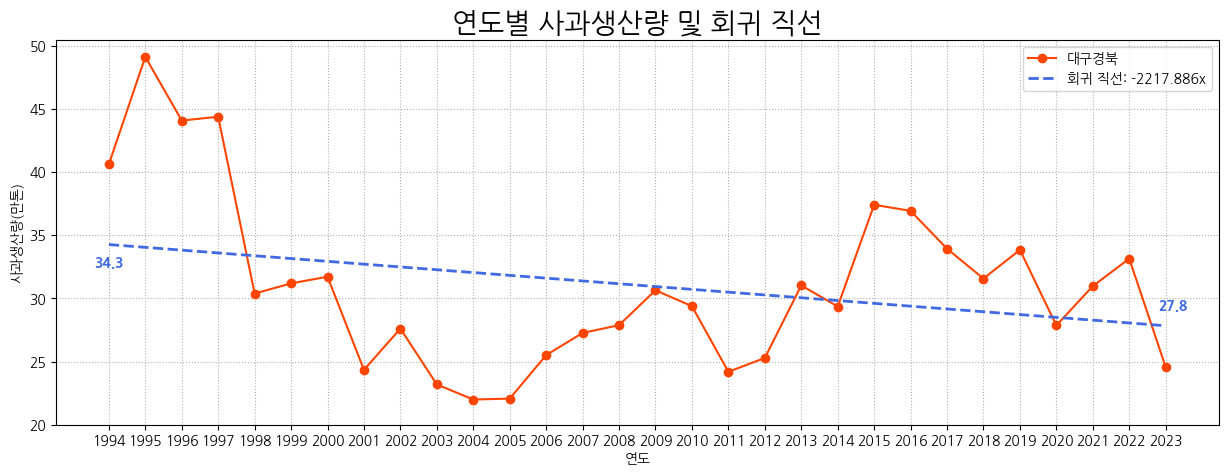

회귀분석 결과:
기울기 (slope): -2217.8858731924356
절편 (intercept): 4765146.742973674
상관계수 (r_value): -0.2874587344695001
p-value: 0.1234893034273157
표준 오차 (std_err): 1396.549517547072


In [7]:
plt.figure(figsize=(15, 5))
appleDF_DG = appleDF.loc['대구경북']
slope_apple, intercept_apple, r_value_apple, p_value_apple, std_err_apple = stats.linregress(appleDF_DG.index, appleDF_DG)
regression_line_apple = slope_apple * appleDF_DG.index + intercept_apple

appleDF_DG.plot(marker='o', color='orangered', ls='-')
plt.plot(appleDF_DG.index, regression_line_apple, color='royalblue', ls='--', lw=2.0, label=f'회귀 직선: {slope_apple:.3f}x')

min_value = appleDF_DG.index.min(), regression_line_apple.min()
max_value = appleDF_DG.index.max(), regression_line_apple.max()

# 최대값과 최소값에 숫자로 표시
plt.text(max_value[0]+0.2, min_value[1]+10000, f'{min_value[1] / 10000:.1f}', ha='center', va='bottom', weight='bold', color='royalblue')
plt.text(min_value[0], max_value[1]-10000, f'{max_value[1] / 10000:.1f}', ha='center', va='top', weight='bold', color='royalblue')

plt.title(f'연도별 사과생산량 및 회귀 직선', fontsize=20)
plt.xlabel('연도')
plt.ylabel(f'사과생산량(만톤)')
plt.xticks(np.arange(appleDF_DG.index.min(), appleDF_DG.index.max()+1))
plt.yticks(np.arange(200000, 510000, 50000), np.arange(20, 51, 5))
plt.grid(ls=':')
plt.legend()
plt.show()

print("회귀분석 결과:")
print("기울기 (slope):", slope_apple)
print("절편 (intercept):", intercept_apple)
print("상관계수 (r_value):", r_value_apple)
print("p-value:", p_value_apple)
print("표준 오차 (std_err):", std_err_apple)


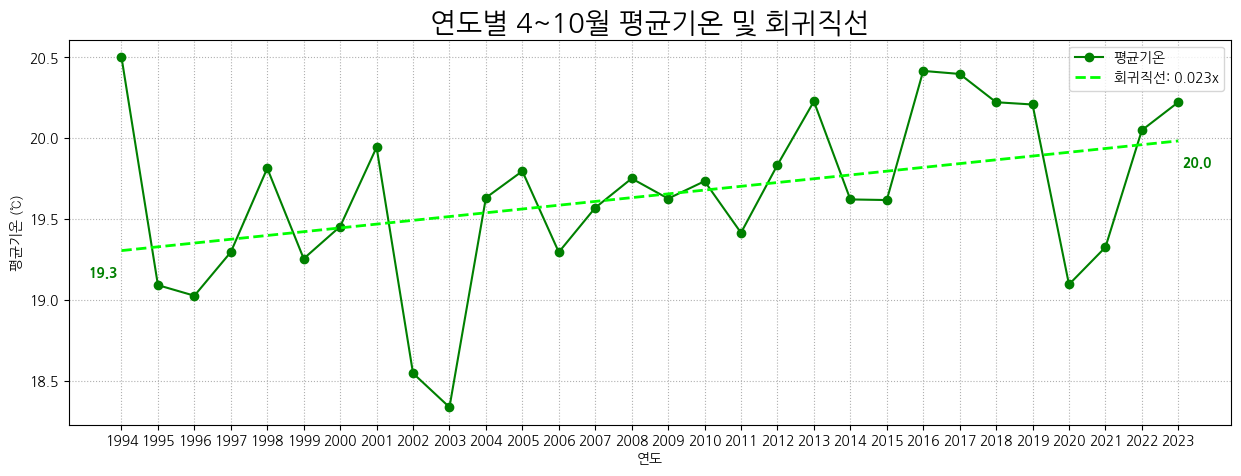

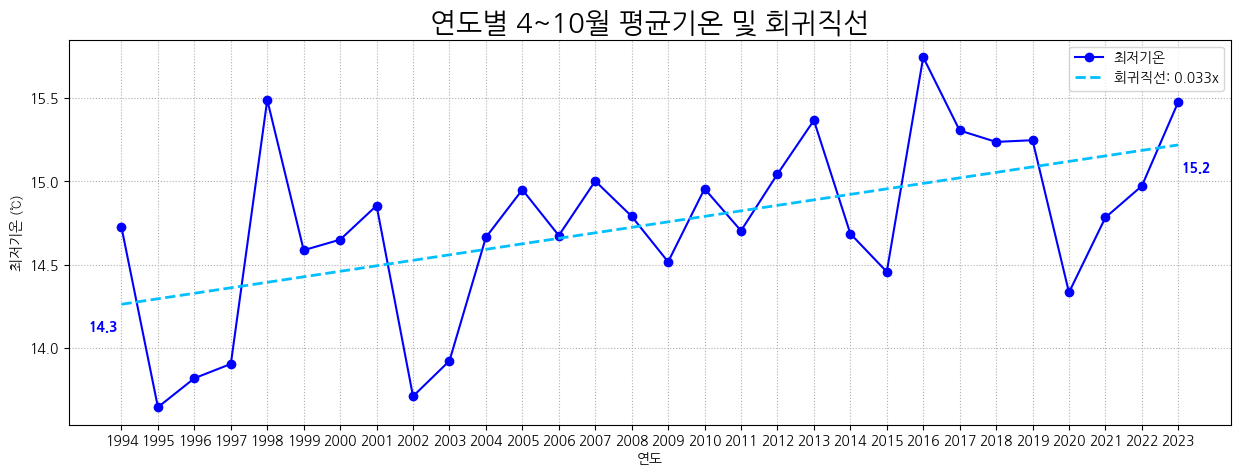

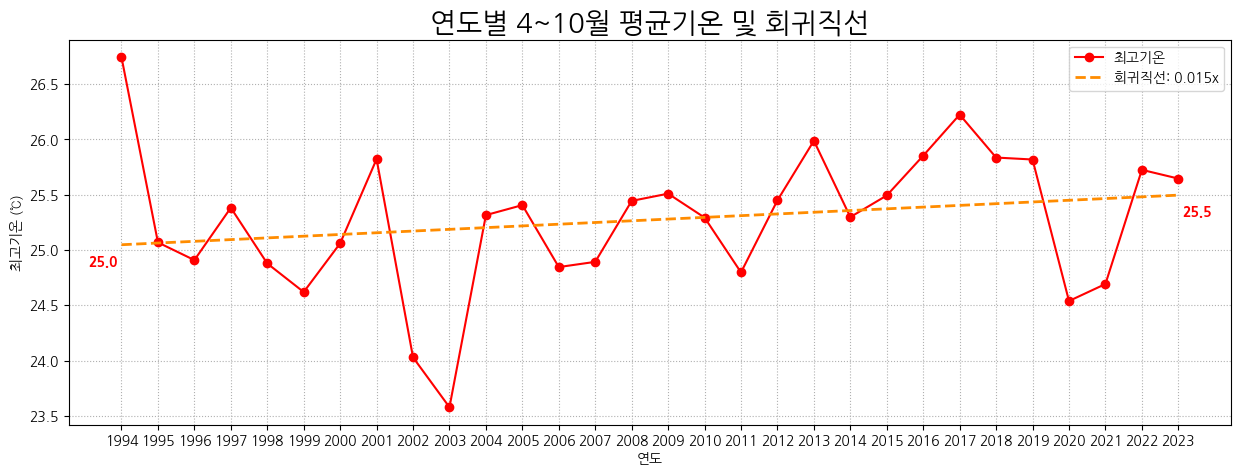

In [24]:
# plt.figure(figsize=(15, 15))
colorList = ['green', 'blue', 'red', 'lime', 'deepskyblue', 'darkorange']
tempDF_month = tempDF[(tempDF['월'] >= 4) & (tempDF['월'] <= 10)]
for idx, col in enumerate(tempDF.columns[1:4]):
    plt.figure(figsize=(15, 5))
    
    yearly_avg_temp = tempDF_month.groupby('연도')[col].mean()
    slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = stats.linregress(yearly_avg_temp.index, yearly_avg_temp)
    regression_line_temp = slope_temp * yearly_avg_temp.index + intercept_temp
    
    yearly_avg_temp.plot(marker='o', color=colorList[idx], linestyle='-')
    plt.plot(yearly_avg_temp.index, regression_line_temp, color=colorList[idx+3], linestyle='--', lw=2.0, label=f'회귀직선: {slope_temp:.3f}x')
    
    min_value = yearly_avg_temp.index.min(), regression_line_temp.min()
    max_value = yearly_avg_temp.index.max(), regression_line_temp.max()
    
    # 최대값과 최소값에 숫자로 표시
    plt.text(min_value[0]-0.5, min_value[1]-0.1, f'{min_value[1]:.1f}', ha='center', va='top', weight='bold', color=colorList[idx])
    plt.text(max_value[0]+0.5, max_value[1]-0.1, f'{max_value[1]:.1f}', ha='center', va='top', weight='bold', color=colorList[idx])
    
    plt.title(f'연도별 4~10월 평균기온 및 회귀직선', fontsize=20)
    plt.xlabel('연도')
    plt.ylabel(f'{col} (℃)')
    plt.grid(ls=':')
    plt.legend()
    
    # print(f"{col} 회귀분석 결과:")
    # print("기울기 (slope):", slope_temp)
    # print("절편 (intercept):", intercept_temp)
    # print("상관계수 (r_value):", r_value_temp)
    # print("p-value:", p_value_temp)
    # print("표준 오차 (std_err):", std_err_temp)
    # print()

    plt.xticks(np.arange(yearly_avg_temp.index.min(), yearly_avg_temp.index.max()+1))
# plt.yticks(np.arange(13, 29, 1))
plt.show()


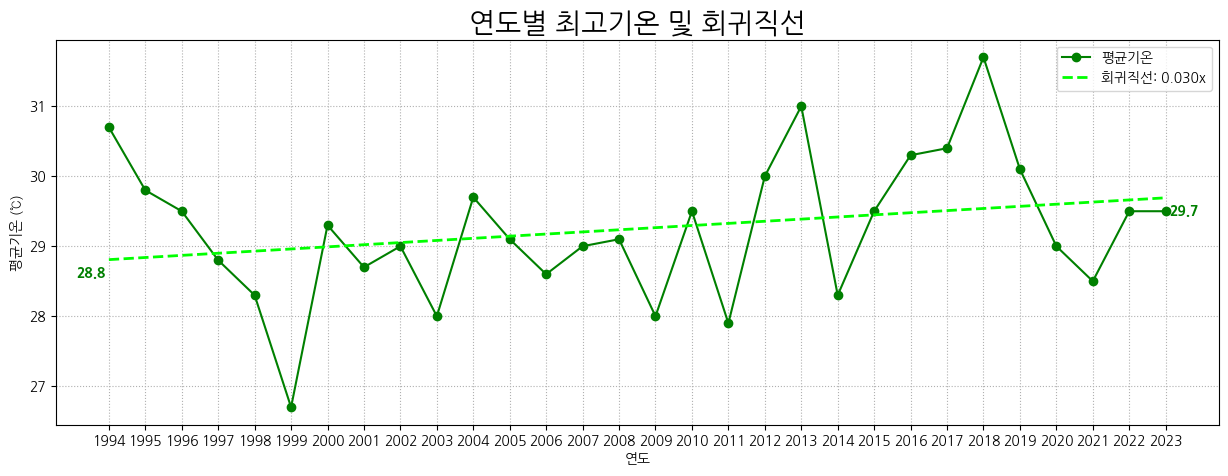

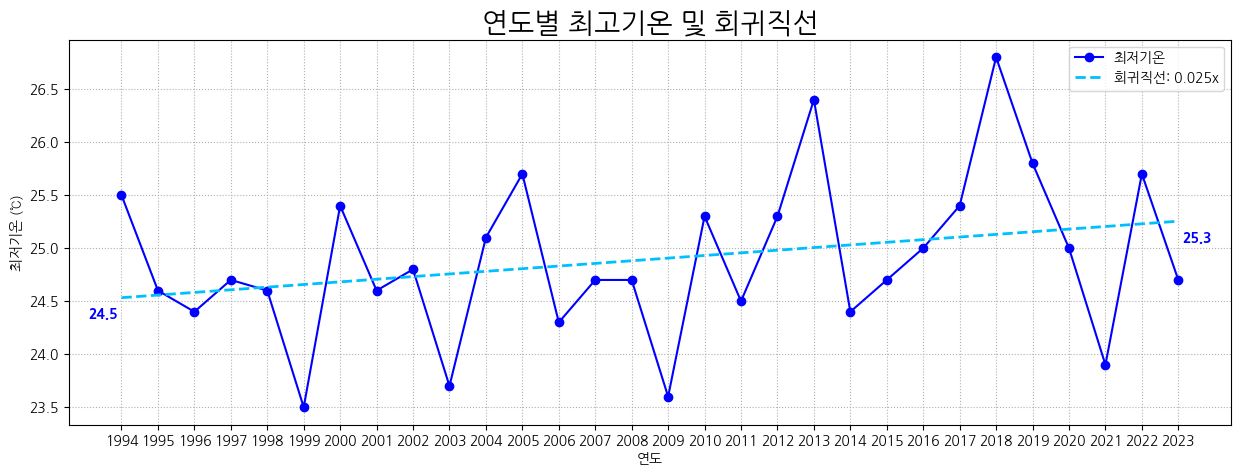

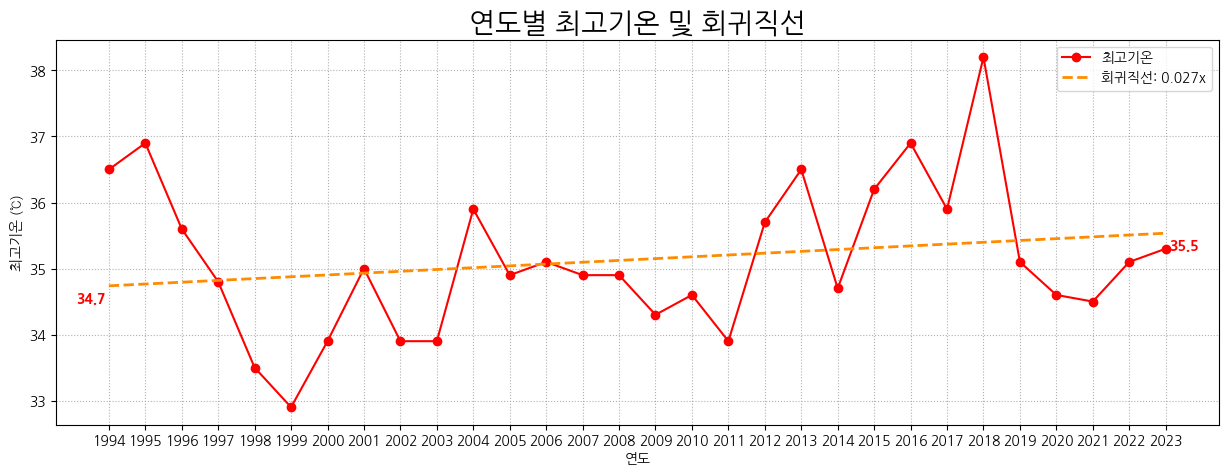

In [27]:
colorList = ['green', 'blue', 'red', 'lime', 'deepskyblue', 'darkorange']
for idx, col in enumerate(tempDF.columns[1:4]):
    plt.figure(figsize=(15, 5))
    
    yearly_max_temp = tempDF_month.groupby('연도')[col].max()
    slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = stats.linregress(yearly_max_temp.index, yearly_max_temp)
    regression_line_temp = slope_temp * yearly_max_temp.index + intercept_temp
    
    yearly_max_temp.plot(marker='o', color=colorList[idx], linestyle='-')
    plt.plot(yearly_max_temp.index, regression_line_temp, color=colorList[idx+3], linestyle='--', lw=2.0, label=f'회귀직선: {slope_temp:.3f}x')
    
    min_value = yearly_max_temp.index.min(), regression_line_temp.min()
    max_value = yearly_max_temp.index.max(), regression_line_temp.max()
    
    # 최대값과 최소값에 숫자로 표시
    plt.text(min_value[0]-0.5, min_value[1]-0.1, f'{min_value[1]:.1f}', ha='center', va='top', weight='bold', color=colorList[idx])
    plt.text(max_value[0]+0.5, max_value[1]-0.1, f'{max_value[1]:.1f}', ha='center', va='top', weight='bold', color=colorList[idx])
    
    plt.title(f'연도별 최고기온 및 회귀직선', fontsize=20)
    plt.xlabel('연도')
    plt.ylabel(f'{col} (℃)')
    plt.grid(ls=':')
    plt.legend()
    
    # print(f"{col} 회귀분석 결과:")
    # print("기울기 (slope):", slope_temp)
    # print("절편 (intercept):", intercept_temp)
    # print("상관계수 (r_value):", r_value_temp)
    # print("p-value:", p_value_temp)
    # print("표준 오차 (std_err):", std_err_temp)
    # print()

    plt.xticks(np.arange(yearly_max_temp.index.min(), yearly_max_temp.index.max()+1))
# plt.yticks(np.arange(13, 29, 1))
plt.show()


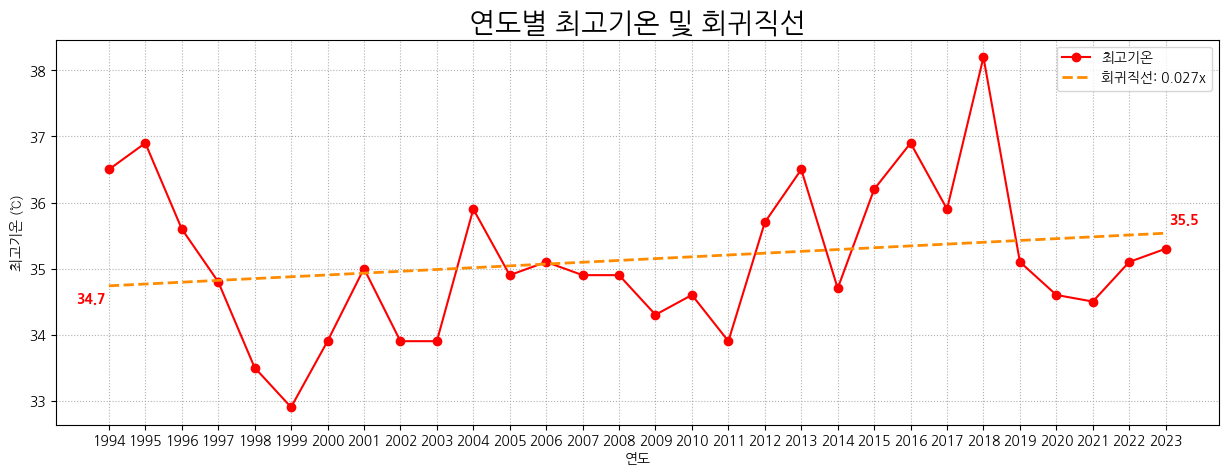

In [64]:
plt.figure(figsize=(15, 5))

yearly_max_temp = tempDF.groupby('연도')['최고기온'].max()
slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = stats.linregress(yearly_max_temp.index, yearly_max_temp)
regression_line_temp = slope_temp * yearly_max_temp.index + intercept_temp

yearly_max_temp.plot(marker='o', color='red', linestyle='-')
plt.plot(yearly_max_temp.index, regression_line_temp, color='darkorange', linestyle='--', lw=2.0, label=f'회귀직선: {slope_temp:.3f}x')

min_value = yearly_max_temp.index.min(), regression_line_temp.min()
max_value = yearly_max_temp.index.max(), regression_line_temp.max()

# 최대값과 최소값에 숫자로 표시
plt.text(min_value[0]-0.5, min_value[1]-0.1, f'{min_value[1]:.1f}', ha='center', va='top', weight='bold', color='red')
plt.text(max_value[0]+0.5, max_value[1]+0.1, f'{max_value[1]:.1f}', ha='center', va='bottom', weight='bold', color='red')

plt.title(f'연도별 최고기온 및 회귀직선', fontsize=20)
plt.xlabel('연도')
plt.ylabel(f'최고기온 (℃)')
plt.grid(ls=':')
plt.legend()

plt.xticks(np.arange(yearly_max_temp.index.min(), yearly_max_temp.index.max()+1))
plt.show()


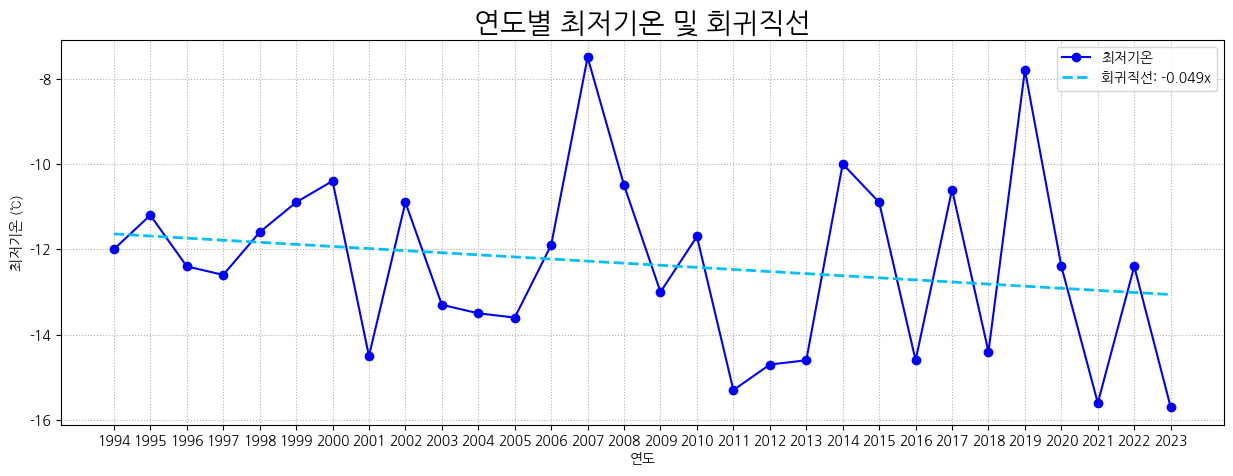

In [63]:
plt.figure(figsize=(15, 5))

yearly_min_temp = tempDF.groupby('연도')['최저기온'].min()
slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = stats.linregress(yearly_min_temp.index, yearly_min_temp)
regression_line_temp = slope_temp * yearly_min_temp.index + intercept_temp

yearly_min_temp.plot(marker='o', color='blue', linestyle='-')
plt.plot(yearly_min_temp.index, regression_line_temp, color='deepskyblue', linestyle='--', lw=2.0, label=f'회귀직선: {slope_temp:.3f}x')

plt.title(f'연도별 최저기온 및 회귀직선', fontsize=20)
plt.xlabel('연도')
plt.ylabel(f'최저기온 (℃)')
plt.grid(ls=':')
plt.legend()

plt.xticks(np.arange(yearly_min_temp.index.min(), yearly_min_temp.index.max()+1))
plt.show()


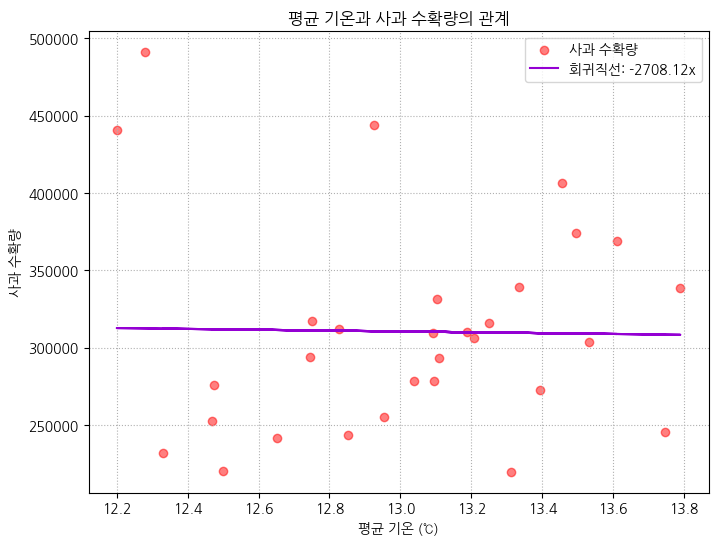

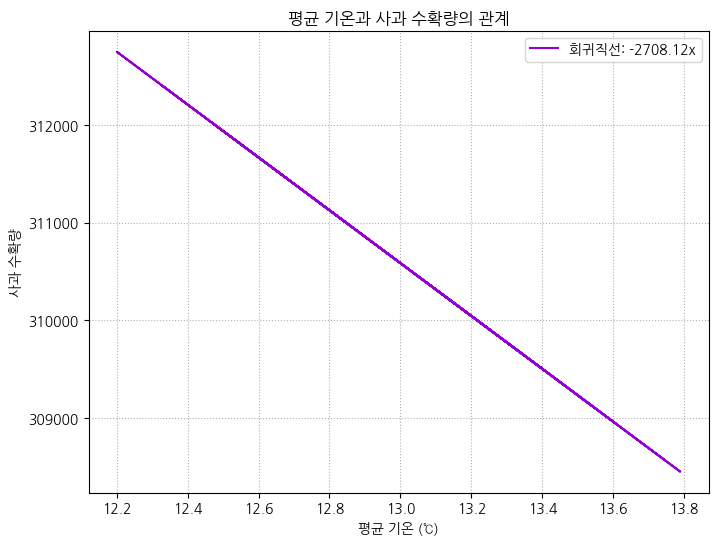

회귀분석 결과:
기울기 (slope): -2708.1150115850755
절편 (intercept): 345792.49859799835
상관계수 (r_value): -0.017422934603812657
p-value: 0.9271897460164265
표준 오차 (std_err): 29369.790960211565


In [25]:
merged_df = tempDF.groupby('연도')['평균기온'].mean().reset_index().merge(appleDF.T, left_on='연도', right_index=True)
merged_df = merged_df[['연도', '평균기온', '대구경북']]
merged_df.columns = ['연도', '평균기온', '사과수확량']

x = merged_df['평균기온']
y = merged_df['사과수확량']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red', alpha=0.5, label='사과 수확량')
plt.plot(x, slope*x + intercept, color='darkviolet', label=f'회귀직선: {slope:.2f}x')
plt.title('평균 기온과 사과 수확량의 관계')
plt.xlabel('평균 기온 (℃)')
plt.ylabel('사과 수확량')
plt.legend()
plt.grid(ls=":")
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(x, slope*x + intercept, color='darkviolet', label=f'회귀직선: {slope:.2f}x')
plt.title('평균 기온과 사과 수확량의 관계')
plt.xlabel('평균 기온 (℃)')
plt.ylabel('사과 수확량')
plt.legend()
plt.grid(ls=":")
plt.show()

print("회귀분석 결과:")
print("기울기 (slope):", slope)
print("절편 (intercept):", intercept)
print("상관계수 (r_value):", r_value)
print("p-value:", p_value)
print("표준 오차 (std_err):", std_err)


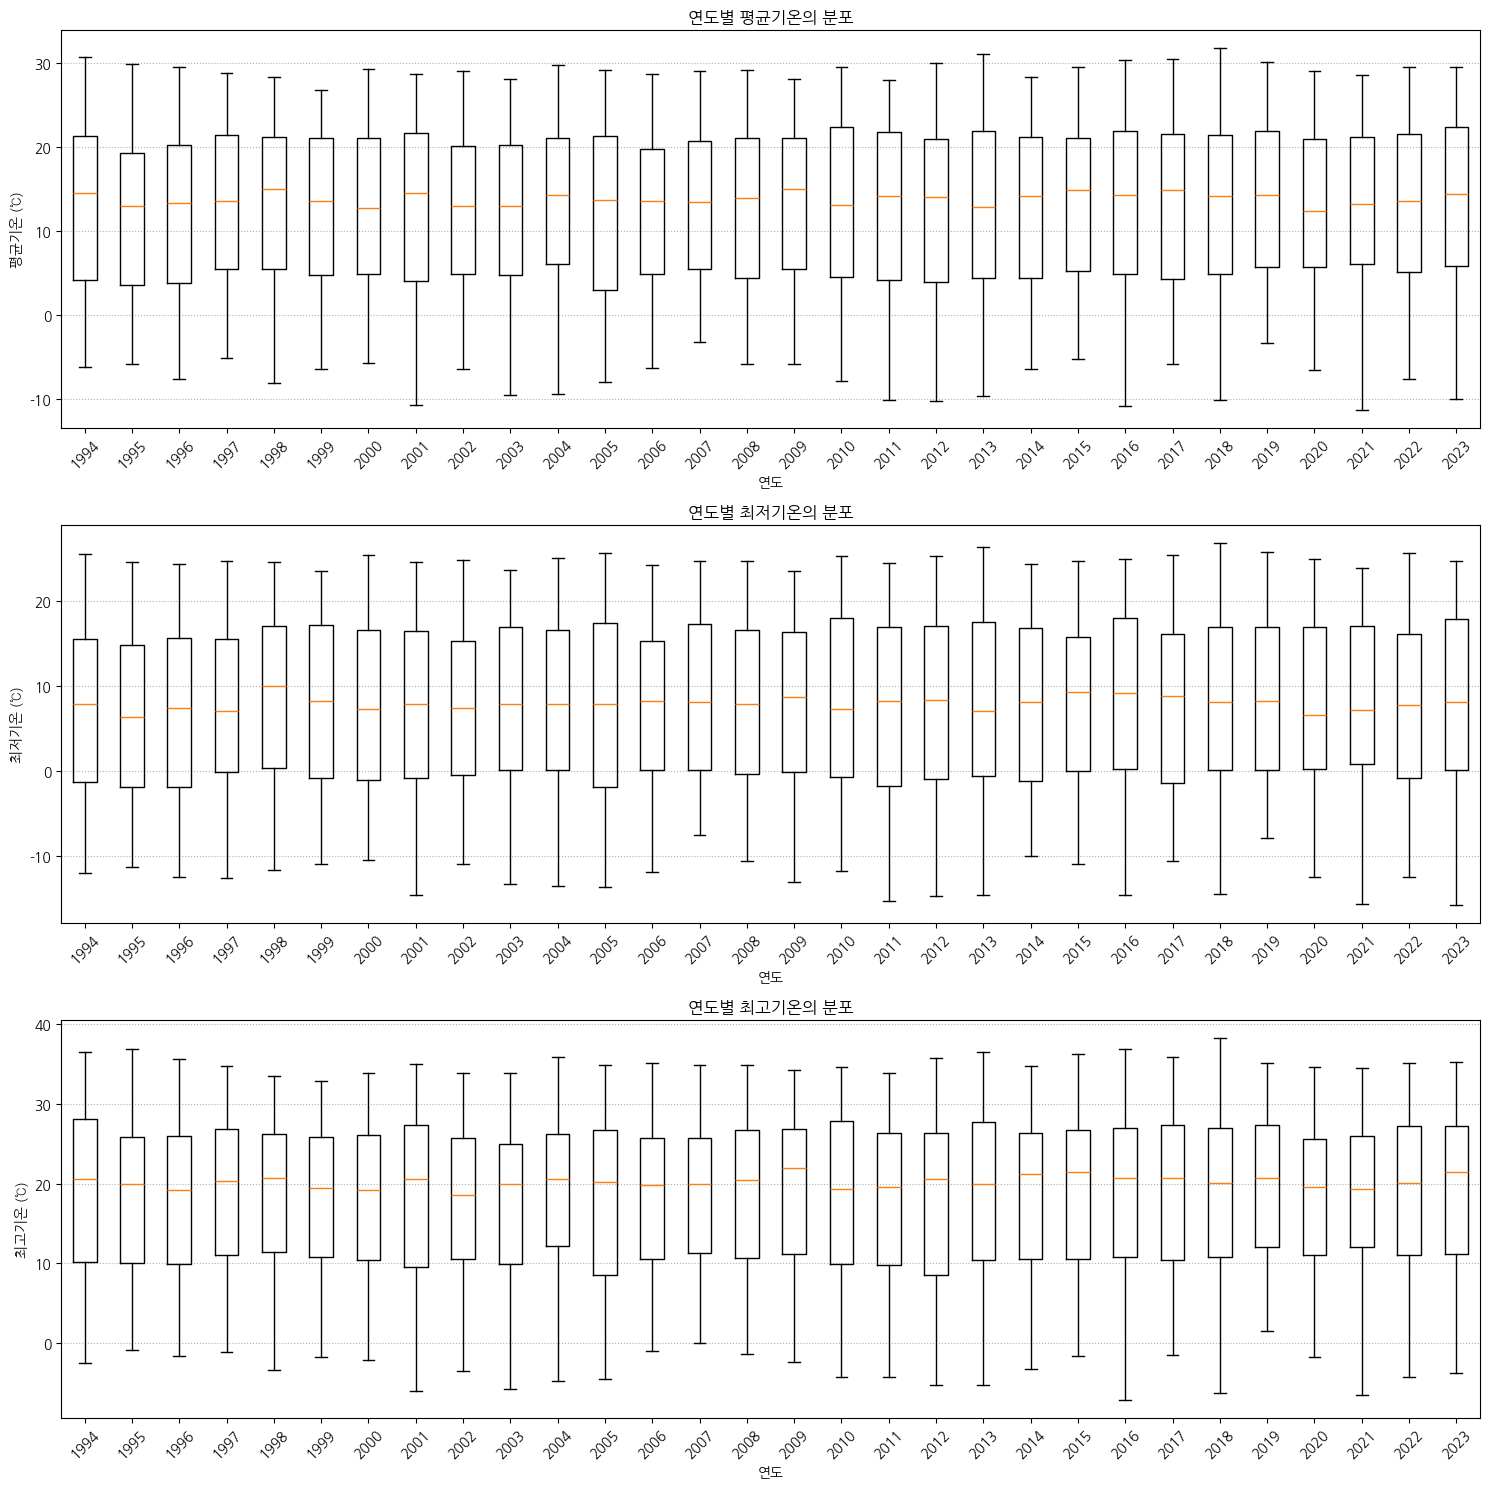

In [9]:
plt.figure(figsize=(15, 15))
for idx, col in enumerate(tempDF.columns[1:4], 1):
    temp_by_year = tempDF.groupby('연도')[col].apply(list)
    plt.subplot(3, 1, idx)
    plt.boxplot(temp_by_year.values)
    plt.title(f'연도별 {col}의 분포')
    plt.xlabel('연도')
    plt.ylabel(f'{col} (℃)')
    plt.xticks(range(1, len(temp_by_year) + 1), temp_by_year.index, rotation=45)
    plt.grid(axis='y', ls=':')
plt.tight_layout()
plt.show()


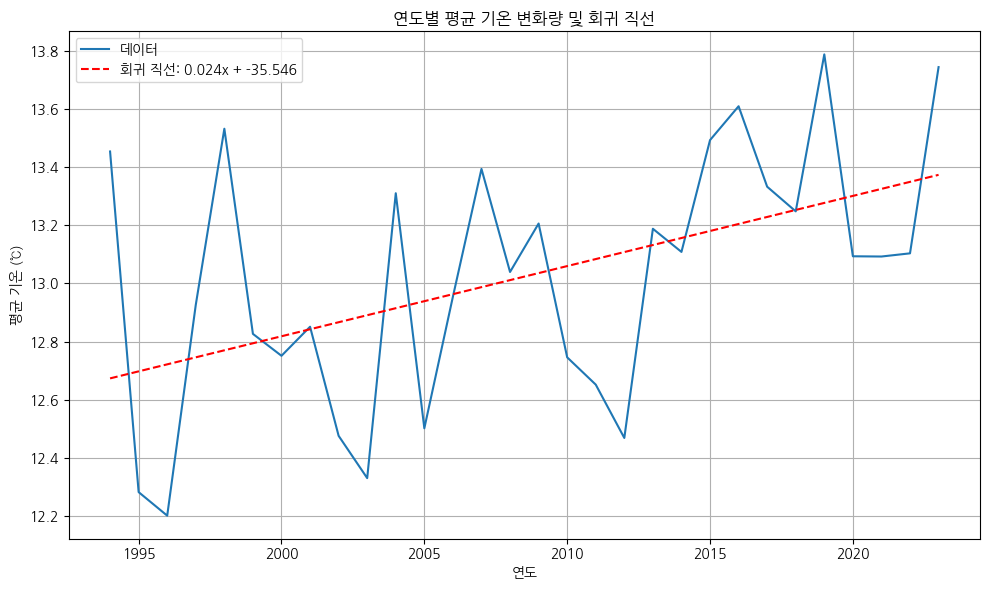

회귀분석 결과:
기울기 (slope): 0.024182249558920517
절편 (intercept): -35.54640198313458
상관계수 (r_value): 0.4871680647982563
p-value: 0.006326214155980412
표준 오차 (std_err): 0.008192310948341254


In [10]:
# 연도별 평균 기온 데이터 추출
mean_temp_by_year = tempDF.groupby('연도')['평균기온'].mean()

# 회귀분석 수행
slope, intercept, r_value, p_value, std_err = stats.linregress(mean_temp_by_year.index, mean_temp_by_year)
regression_line = slope * mean_temp_by_year.index + intercept

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(mean_temp_by_year.index, mean_temp_by_year, label='데이터')
plt.plot(mean_temp_by_year.index, regression_line, color='red', linestyle='--', label=f'회귀 직선: {slope:.3f}x + {intercept:.3f}')
plt.title('연도별 평균 기온 변화량 및 회귀 직선')
plt.xlabel('연도')
plt.ylabel('평균 기온 (℃)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 회귀분석 결과 출력
print("회귀분석 결과:")
print("기울기 (slope):", slope)
print("절편 (intercept):", intercept)
print("상관계수 (r_value):", r_value)
print("p-value:", p_value)
print("표준 오차 (std_err):", std_err)


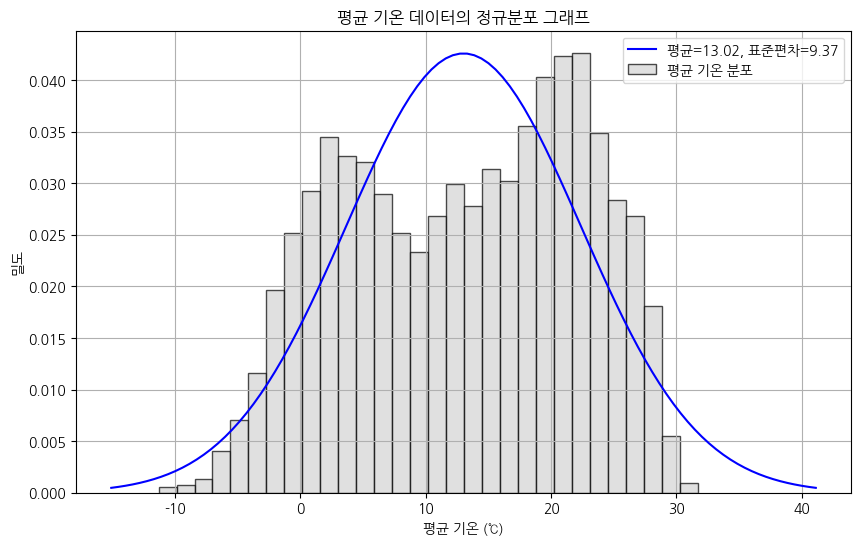

In [11]:
plt.figure(figsize=(10, 6))

# 평균 기온 데이터를 이용하여 정규분포를 그립니다.
mean_temp = tempDF['평균기온']
mu = mean_temp.mean()  # 평균
sigma = mean_temp.std()  # 표준편차

# 정규분포 그래프를 그립니다.
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='blue', label=f'평균={mu:.2f}, 표준편차={sigma:.2f}')

# 그래프에 평균 기온 데이터의 히스토그램을 추가합니다.
plt.hist(mean_temp, bins=30, density=True, color='lightgrey', edgecolor='black', alpha=0.7, label='평균 기온 분포')

plt.title('평균 기온 데이터의 정규분포 그래프')
plt.xlabel('평균 기온 (℃)')
plt.ylabel('밀도')
plt.legend()
plt.grid(True)
plt.show()


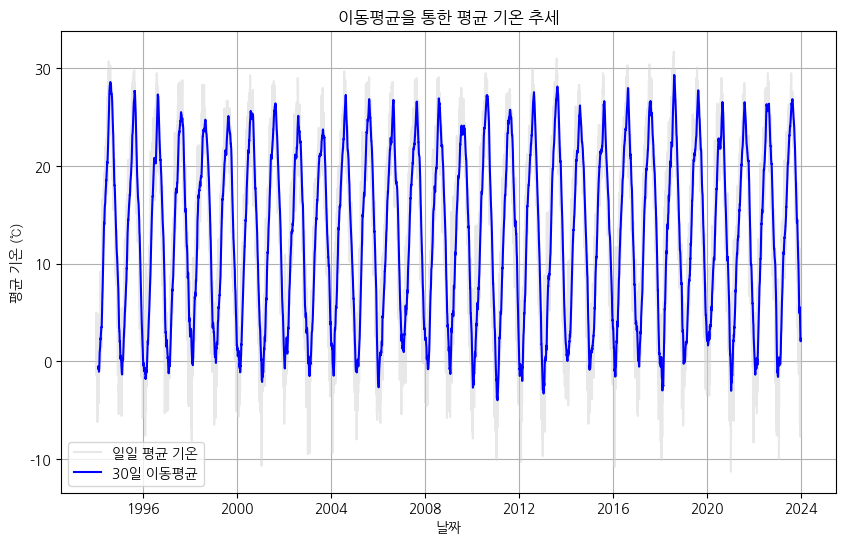

In [12]:
# 이동평균 그래프
plt.figure(figsize=(10, 6))
tempDF['이동평균'] = tempDF['평균기온'].rolling(window=30).mean()  # 30일 이동평균 계산
plt.plot(tempDF['날짜'], tempDF['평균기온'], color='lightgrey', alpha=0.5, label='일일 평균 기온')
plt.plot(tempDF['날짜'], tempDF['이동평균'], color='blue', label='30일 이동평균')
plt.title('이동평균을 통한 평균 기온 추세')
plt.xlabel('날짜')
plt.ylabel('평균 기온 (℃)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
def draw_scatter(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    regression_line = slope * x + intercept
    # poly_fit = np.polyfit(x, y, deg=1)
    # poly_1d = np.poly1d(poly_fit)
    # xs = np.linspace(x.min(), x.max())
    # ys = poly_1d(xs)
    plt.plot(x, regression_line, label=f"{slope:.3f}x", lw=0.5)
    plt.scatter(x, y)
    plt.legend()
    print("회귀분석 결과:")
    print("기울기 (slope):", slope)
    print("절편 (intercept):", intercept)
    print("상관계수 (r_value):", r_value)
    print("p-value:", p_value)
    print("표준 오차 (std_err):", std_err)


회귀분석 결과:
기울기 (slope): -14.335973860688917
절편 (intercept): 393.34602611426993
상관계수 (r_value): -0.9999999999999998
p-value: 1.7351664973571113e-216
표준 오차 (std_err): 5.709305670904777e-08


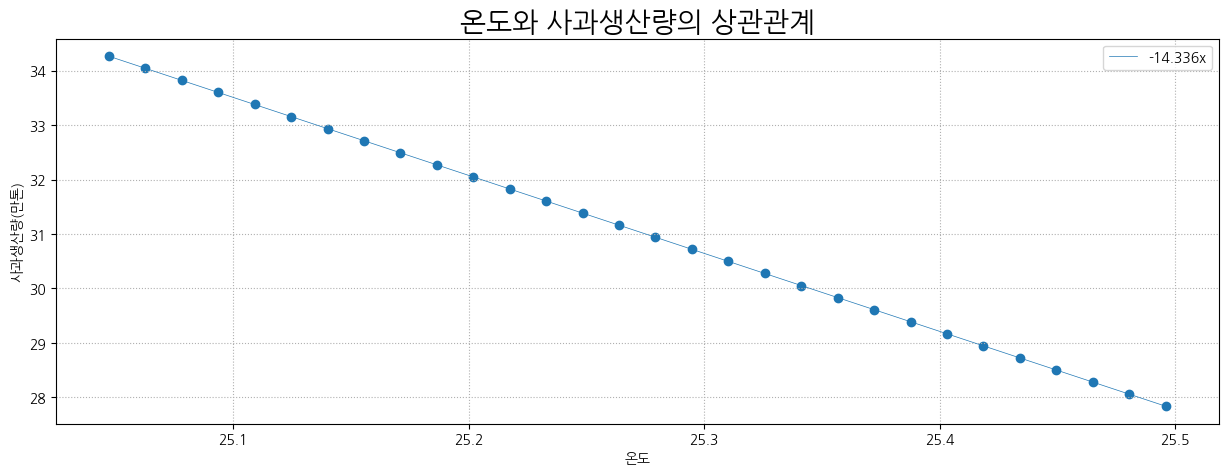

In [14]:
plt.figure(figsize=(15, 5))
draw_scatter(regression_line_temp, regression_line_apple/10000)

plt.title(f'온도와 사과생산량의 상관관계', fontsize=20)
plt.xlabel('온도')
plt.ylabel(f'사과생산량(만톤)')
plt.grid(ls=':')
plt.show()


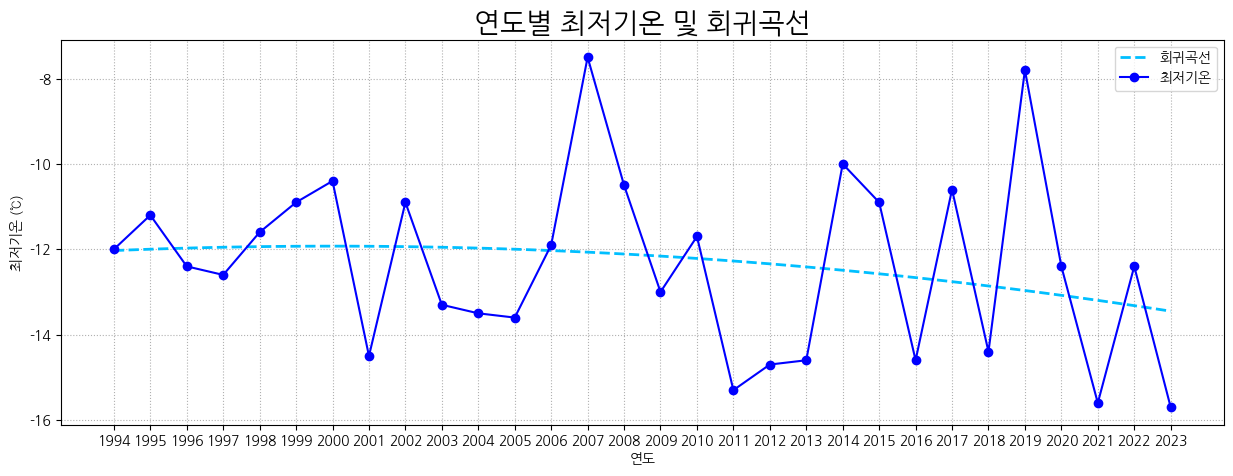

In [74]:
plt.figure(figsize=(15, 5))

# 연도별 최저 기온 데이터를 추출합니다.
yearly_min_temp = tempDF.groupby('연도')['최저기온'].min()

# 다항 회귀 분석을 수행합니다.
degree = 2  # 다항식의 차수
coefficients = np.polyfit(yearly_min_temp.index, yearly_min_temp, degree)
polynomial = np.poly1d(coefficients)

# 회귀 곡선을 그립니다.
x_values = np.linspace(yearly_min_temp.index.min(), yearly_min_temp.index.max(), 100)
plt.plot(x_values, polynomial(x_values), color='deepskyblue', linestyle='--', lw=2.0, label=f'회귀곡선')

# 연도별 최저 기온을 산점도로 표시합니다.
yearly_min_temp.plot(marker='o', color='blue', linestyle='-')

plt.title(f'연도별 최저기온 및 회귀곡선', fontsize=20)
plt.xlabel('연도')
plt.ylabel(f'최저기온 (℃)')
plt.grid(ls=':')
plt.legend()

plt.xticks(np.arange(yearly_min_temp.index.min(), yearly_min_temp.index.max()+1))
plt.show()


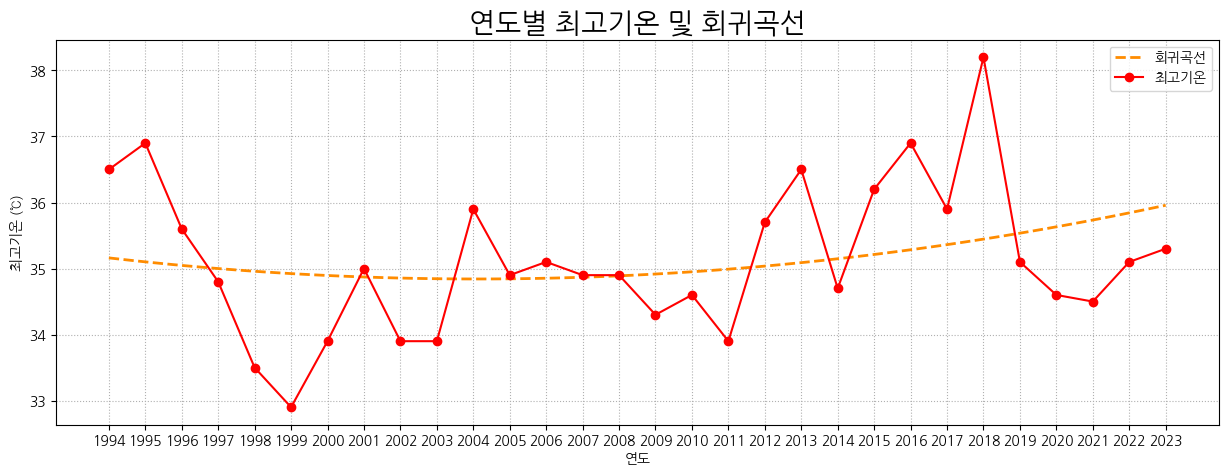

In [57]:
plt.figure(figsize=(15, 5))

# 연도별 최저 기온 데이터를 추출합니다.
yearly_min_temp = tempDF.groupby('연도')['최고기온'].max()

# 다항 회귀 분석을 수행합니다.
degree = 2  # 다항식의 차수
coefficients = np.polyfit(yearly_min_temp.index, yearly_min_temp, degree)
polynomial = np.poly1d(coefficients)

# 회귀 곡선을 그립니다.
x_values = np.linspace(yearly_min_temp.index.min(), yearly_min_temp.index.max(), 100)
plt.plot(x_values, polynomial(x_values), color='darkorange', linestyle='--', lw=2.0, label=f'회귀곡선')

# 연도별 최저 기온을 산점도로 표시합니다.
yearly_min_temp.plot(marker='o', color='red', linestyle='-')

plt.title(f'연도별 최고기온 및 회귀곡선', fontsize=20)
plt.xlabel('연도')
plt.ylabel(f'최고기온 (℃)')
plt.grid(ls=':')
plt.legend()

plt.xticks(np.arange(yearly_min_temp.index.min(), yearly_min_temp.index.max()+1))
plt.show()


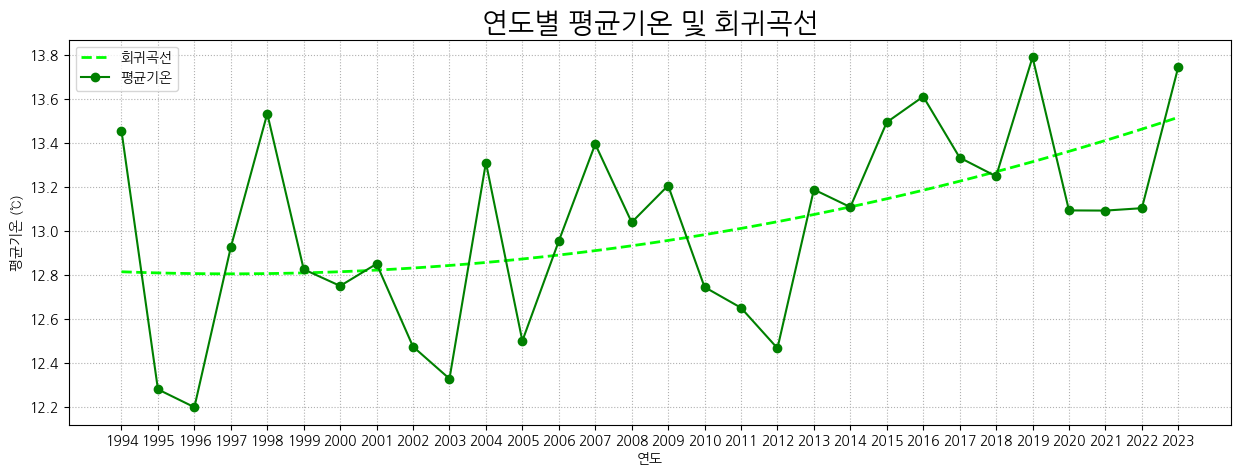

In [43]:
plt.figure(figsize=(15, 5))

# 연도별 최저 기온 데이터를 추출합니다.
yearly_min_temp = tempDF.groupby('연도')['평균기온'].mean()

# 다항 회귀 분석을 수행합니다.
degree = 2  # 다항식의 차수
coefficients = np.polyfit(yearly_min_temp.index, yearly_min_temp, degree)
polynomial = np.poly1d(coefficients)

# 회귀 곡선을 그립니다.
x_values = np.linspace(yearly_min_temp.index.min(), yearly_min_temp.index.max(), 100)
plt.plot(x_values, polynomial(x_values), color='lime', linestyle='--', lw=2.0, label=f'회귀곡선')

# 연도별 최저 기온을 산점도로 표시합니다.
yearly_min_temp.plot(marker='o', color='green', linestyle='-')

plt.title(f'연도별 평균기온 및 회귀곡선', fontsize=20)
plt.xlabel('연도')
plt.ylabel(f'평균기온 (℃)')
plt.grid(ls=':')
plt.legend()

plt.xticks(np.arange(yearly_min_temp.index.min(), yearly_min_temp.index.max()+1))
plt.show()


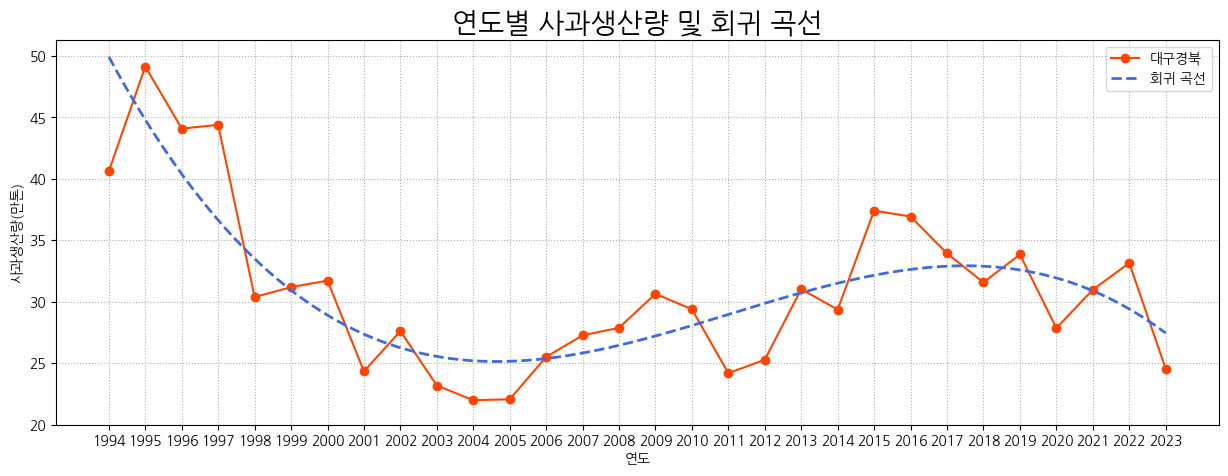

In [61]:
plt.figure(figsize=(15, 5))

# 대구경북 지역의 연도별 사과 생산량 데이터 추출
appleDF_DG = appleDF.loc['대구경북']

# 사과 생산량에 대한 회귀 분석 수행
slope_apple, intercept_apple, r_value_apple, p_value_apple, std_err_apple = stats.linregress(appleDF_DG.index, appleDF_DG)
regression_line_apple = slope_apple * appleDF_DG.index + intercept_apple

# 다항 회귀 분석을 위해 데이터 준비
x_values = np.linspace(appleDF_DG.index.min(), appleDF_DG.index.max(), 100)
coefficients = np.polyfit(appleDF_DG.index, appleDF_DG, 3)
polynomial = np.poly1d(coefficients)

# 사과 생산량과 회귀 곡선을 그래프로 표시
appleDF_DG.plot(marker='o', color='orangered', ls='-')
plt.plot(x_values, polynomial(x_values), color='royalblue', ls='--', lw=2.0, label=f'회귀 곡선')

# 그래프 제목과 축 라벨, 눈금 설정
plt.title(f'연도별 사과생산량 및 회귀 곡선', fontsize=20)
plt.xlabel('연도')
plt.ylabel(f'사과생산량(만톤)')
plt.xticks(np.arange(appleDF_DG.index.min(), appleDF_DG.index.max()+1))
plt.yticks(np.arange(200000, 510000, 50000), np.arange(20, 51, 5))
plt.grid(ls=':')
plt.legend()
plt.show()
